# Solute transport in uniform background flow

AdePy provides several solutions for solute transport in groundwater with uniform background flow. These can be used to predict the fate of dissolved solutes in several common groundwater contamination settings.

In [2]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Assumptions and limitations

 - uniform background flow (also means no vertical flow components, e.g. clean recharge pushing a plume downwards, no pump-and-treat modelling)
 - single-layer systems
 - single-domain systems
 - constant transport and reaction parameters in time and space
 - no density- or viscocity-dependent flow
 - single-species (except for `adepy.chain_reaction`)
 - simplified boundary conditions (no arbitrary boundary conditions in the field, e.g. sinks that take remove mass at the ambient aquifer concentration)
 - dissolved phase only (and linear sorbed)

- easy-of-use
- fast and cheap to build
- provide valuable insight


## 1D, 2D or 3D solutions

Solutions for 1D, 2D and 3D transport in uniform background flow are available from the `adepy.uniform.oneD`, `adepy.uniform.twoD` and `adepy.uniform.threeD` modules, respectively. In 1D transport, the contaminant can only spread along a single dimension, in the direction of flow. This may be valid for column experiments or along streamlines of particles with constant velocity, such as plume centerlines of vertical percolation pathways. In 2D transport, spreading occurs along two dimensions, as can be the case for thin aquifers or aquifers where the plume is well-mixed along the vertical axis. Alternatively, 2D solutions may be used for transport simulations along an aquifer cross-section, where the second model dimension then represents the real-world vertical axis. In doing so, it is assumed that solute spreading perpendicular to the cross-section is negligible. Lastly, 3D solutions simulate solute spreading along all three Cartesian spatial coordinate axes.

Care must be taken when selecting the correct dimensionality of the system, as significant errors may occur when this is misjudged [(Zhen & Bennet, 2002)](https://qa.store.wiley.com/en-no/Applied+Contaminant+Transport+Modeling%2C+2nd+Edition-p-9780471384779). As the example below shows, approximating a 3D problem with a 2D or 1D solution (or vice versa) will lead to errors in the predicated concentration. As the dimensionality of the spreading increases, the concentration decreases since the solute can dilute more along the extra dimension(s).

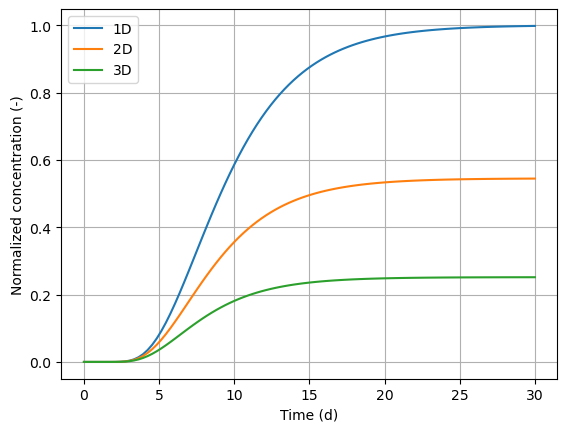

In [2]:
from adepy.uniform import patchi, stripi, seminf1

B = 10  # aquifer thickness, m
v = 1  # m/d
al = 1
ah = 0.1
av = 0.01
c0 = 1

# source geometry
y1 = -1
y2 = 1
z1 = -0.25
z2 = 0.25

# observation point
x = 10
y = 0
z = 0

t = np.linspace(0.01, 30, 100)

# 1D
c1d = seminf1(c0, x, t, v, al)

# 2D
c2d = stripi(c0, x, y, t, v, al, ah, y1, y2)

# 3D
c3d = patchi(c0, x, y, z, t, v, ah, al, av, y1, y2, z1, z2)

plt.plot(t, c1d / c0, label="1D")
plt.plot(t, c2d / c0, label="2D")
plt.plot(t, c3d / c0, label="3D")

plt.xlabel("Time (d)")
plt.ylabel("Normalized concentration (-)")
plt.grid()
plt.legend()

## Initial conditions

For the conservative solutes, initial conditions can be specified by adding a constant background concentrations to the model results. For reactive species, initial conditions are assumed zero.

## Superposition

### In space

### In time

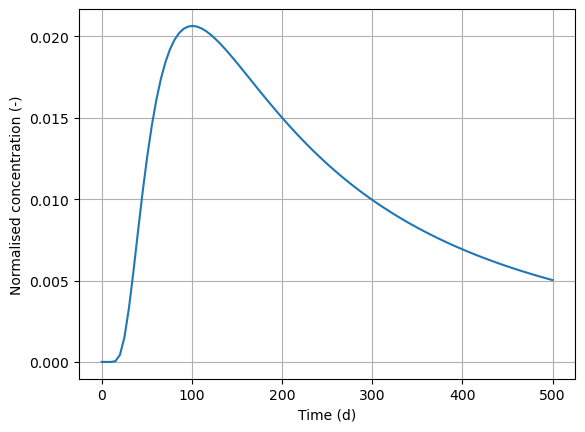

In [3]:
# Example for BTC with point3
from adepy.uniform import point3

c0 = 1000  # injection concentration, mg/L
x = 5
y = 0
z = 0
t = np.linspace(0.001, 500, 100)

v = 0.01  # m/d
n = 0.2  # -
al = 4  # m
ah = 1  # m
av = 1
Q = 1.0  # m^3/d
xc = 0
yc = 0
zc = 0

c = point3(c0, x, y, z, t, v, n, al, ah, av, Q, xc, yc, zc)
c[t > 1] = c[t > 1] - point3(c0, x, y, z, t[t > 1] - 1, v, n, al, ah, av, Q, xc, yc, zc)

plt.plot(t, c / c0)
plt.xlabel("Time (d)")
plt.ylabel("Normalised concentration (-)")
plt.grid()

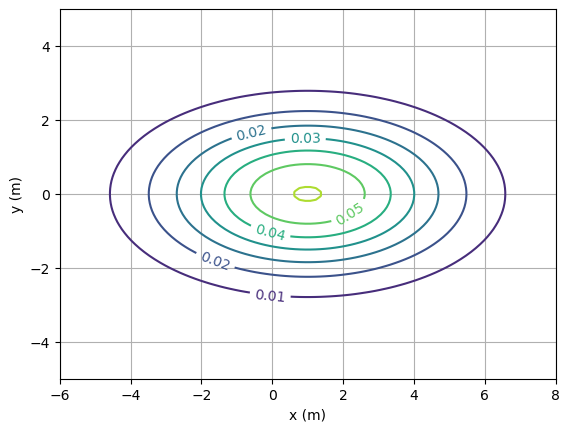

In [4]:
x, y = np.meshgrid(np.linspace(-6, 8, 100), np.linspace(-5, 5, 100))

c = point3(c0, x, y, z, 100, v, n, al, ah, av, Q, xc, yc, zc)
c = c + point3(-c0, x, y, z, 100 - 1, v, n, al, ah, av, Q, xc, yc, zc)

cs = plt.contour(x, y, c / c0)
plt.figaspect(1.0)
plt.clabel(cs, fmt="%.2f")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()

## Source decay

The source concentration argument `c0` in the functions from `adepy.uniform` is only used as a scaling parameter for the underlying solution. This is also the case for the injection rate used in the point-source algorithms. As such, the `c0` argument in the function call can be replaced by unity and calculated unit concentration field can be scaled outside the function by an arbitrary value or array. In doing so, a non-constant source concentration can be used. For example, first-order decay can be applied to the source concentration as well, using:

$$
C_{0,t} = C_{0,0}e^{-\lambda_s t}
$$

with $C_{0,t}$ the source concentration $[M/L^3]$ at time $t$ $[T]$, $C_{0,0}$ the initial source concentration $[M/L^3]$ at time $t=0$ and $\lambda_s$ the first-order decay rate of the source term $[T^{-1}]$. This is illustrated in the following example:

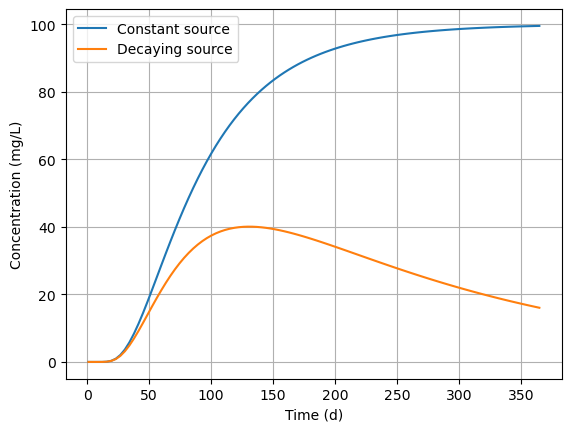

In [7]:
from adepy.uniform import seminf1

c0 = 100  # initial source concentration, mg/L
lamb_s = 0.005  # first-order source decay rate, 1/d
v = 0.05  # groundwater flow, m/d
al = 1  # longitudinal dispersivity, m

x = 5.0  # output x-coordinate, m
t = np.linspace(1, 365, 100)  # output times, d

# calculate and plt concentrations for a constant source term and a decaying source term
c_constant = seminf1(c0=c0, x=x, t=t, v=v, al=al)
c_decay = c0 * np.exp(-lamb_s * t) * seminf1(c0=1.0, x=x, t=t, v=v, al=al)

plt.plot(t, c_constant, label="Constant source")
plt.plot(t, c_decay, label="Decaying source")
plt.xlabel("Time (d)")
plt.ylabel("Concentration (mg/L)")
plt.grid()
plt.legend()

## Chemical reactions

### Linear equilibrium adsorption

### Ion exchange

### First-order decay

If the sorbed phase is not subjected to the first-order decay, the decay rate `lamb` should be replaced by `lamb / R`.

### Parent-daughter chain reactions

In [5]:
from adepy import chain_reaction

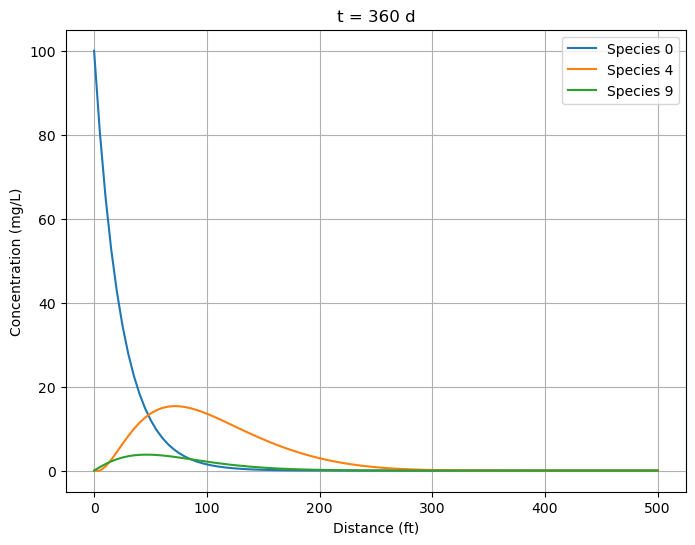

In [6]:
# 1D example ----
from adepy.uniform import seminf1

lamb = [0.03, 0.02, 0.015, 0.01, 0.011, 0.006, 0.002, 0.0015, 0.003, 0.002]
stoi = [0, 0.79, 0.50, 0.45, 0.74, 0.64, 0.37, 0.51, 0.51, 0.45]
ancestry = {
    0: -1,  # species: parent
    1: 0,
    2: 1,
    3: 2,
    4: 1,
    5: 4,
    6: 2,
    7: 6,
    8: 3,
    9: 5,
}

x = np.linspace(0, 500, 100)  # ft
t = 360  # d
c0 = np.zeros(len(lamb))  # all c0 are zero except for the first species
c0[0] = 100
al = 10
v = 0.5  # ft/d

c = chain_reaction(ancestry, lamb, stoi, c0, seminf1, x=x, t=t, al=al, v=v)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in [0, 4, 9]:
    ax.plot(x, c[i], label=f"Species {i}")

ax.set_xlabel("Distance (ft)")
ax.set_ylabel("Concentration (mg/L)")
ax.set_title(f"t = {t} d")
ax.grid()
ax.legend()

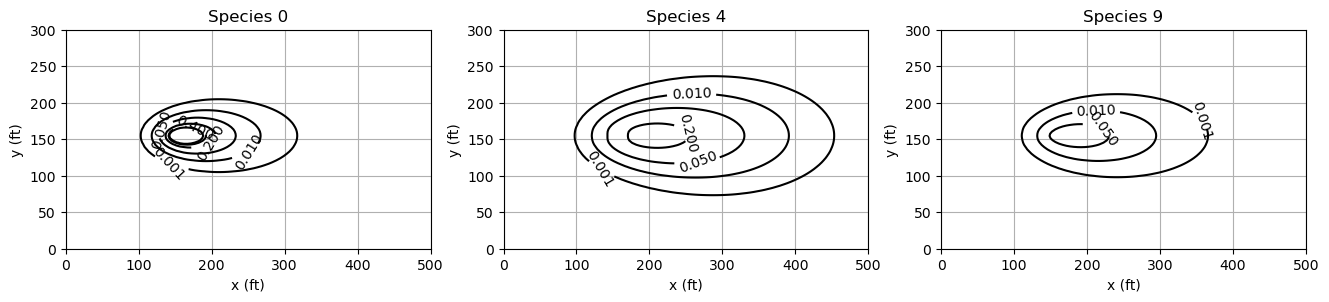

In [7]:
# 2D example ----
from adepy.uniform import point2

x, y = np.meshgrid(np.linspace(0, 500, 100), np.linspace(0, 300, 100))
v = 0.5
al = 10
ah = 3
n = 0.2
xc = 155
yc = 155
Qa = 1 / 10
t = 360

c0 = np.zeros(len(lamb))  # all c0 are zero except for the first species
c0[0] = 100

c = chain_reaction(
    ancestry,
    lamb,
    stoi,
    c0,
    point2,
    x=x,
    y=y,
    t=t,
    v=v,
    n=n,
    al=al,
    ah=ah,
    Qa=Qa,
    xc=xc,
    yc=yc,
)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
for i, id in enumerate([0, 4, 9]):
    cs = ax[i].contour(
        x, y, c[id], colors="black", levels=[0.001, 0.01, 0.05, 0.2, 0.4, 0.5]
    )
    plt.clabel(cs)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"Species {id}")
    ax[i].set_aspect("equal")

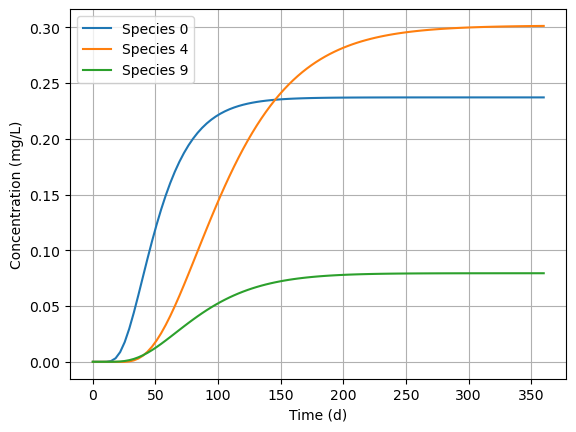

In [8]:
t = np.linspace(0, 360, 100)
x = 200
y = 150

c = chain_reaction(
    ancestry,
    lamb,
    stoi,
    c0,
    point2,
    x=x,
    y=y,
    t=t,
    v=v,
    al=al,
    ah=ah,
    n=n,
    Qa=Qa,
    xc=xc,
    yc=yc,
)

for i in [0, 4, 9]:
    plt.plot(t, c[i], label=f"Species {i}")
plt.xlabel("Time (d)")
plt.ylabel("Concentration (mg/L)")
plt.grid()
plt.legend()

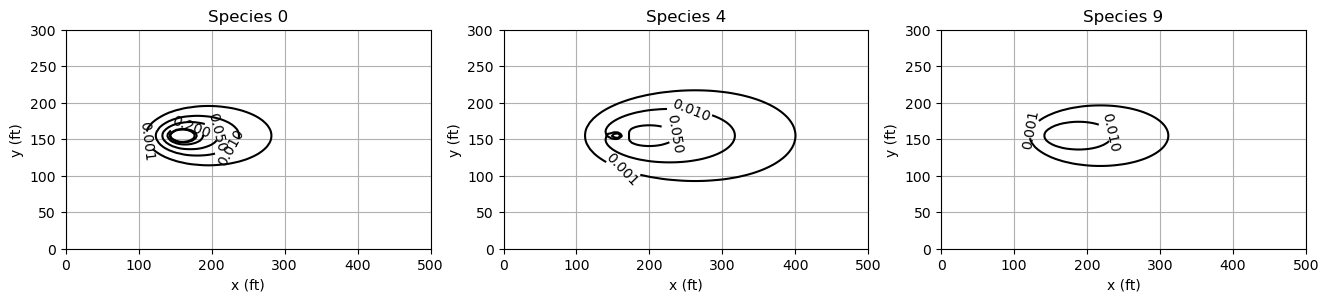

In [9]:
# 3D example ----
from adepy.uniform import point3

x, y = np.meshgrid(np.linspace(0, 500, 100), np.linspace(0, 300, 100))
z = 105
v = 0.5
al = 10
ah = 3
av = 3
n = 0.2
xc = 155
yc = 155
zc = 105
Q = 1
t = 360

c0 = np.zeros(len(lamb))  # all c0 are zero except for the first species
c0[0] = 100

c = chain_reaction(
    ancestry,
    lamb,
    stoi,
    c0,
    point3,
    x=x,
    y=y,
    z=z,
    t=t,
    v=v,
    n=n,
    al=al,
    ah=ah,
    av=av,
    Q=Q,
    xc=xc,
    yc=yc,
    zc=zc,
)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
for i, id in enumerate([0, 4, 9]):
    cs = ax[i].contour(
        x, y, c[id], colors="black", levels=[0.001, 0.01, 0.05, 0.2, 0.4, 0.5]
    )
    plt.clabel(cs)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"Species {id}")
    ax[i].set_aspect("equal")

## Angled flow

\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} \cos\alpha & \sin\alpha \\ -\sin\alpha & \cos\alpha \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix}

## Heat transport